# Project 8: Viame's Frame Level Classifier on MNIST

Viame's Frame Level Classifier uses Machine Learning to classify images. MNIST's Handwritten Digits is a famous dataset that I have already looked at in a previous project. In the prveious projct I used fundamental Deep Learning strategies to create and test a model. In this project I look to use the Viame app. It's a bit of a step backwards to use Viame given the MNIST dataset because I need to convert the pixelated columnn based data into a directory of images in order to train and test the model. To get viame see the following link: https://github.com/VIAME/VIAME, and once you have it, we will be working out of this directory: **Viame/examples/frame_level_classifier/**.

In [1]:
import pandas as pd
import numpy as np
from PIL import Image

This is a great place to get the dataset: https://www.kaggle.com/c/digit-recognizer/data

In [2]:
df = pd.read_csv("train.csv")

We can look at the data

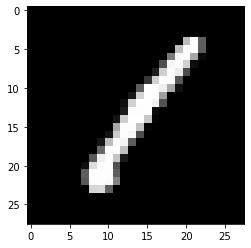

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

aPre = df.iloc[0]
aPost = np.array(aPre[1:])
aMat = aPost.reshape(28,28)

plt.imshow(aMat, cmap="gray")

This view is dandy but the image need to be exported as previously mentoned.

## Training

In order to use a model capable of classifying images it first must be trained. To train with Viame we need four things. A **directory of training images**, a **list of the image names** in a txt file, **labels.txt**, and a **specially formatted csv file**. I'm not gonna create the csv file here, however, here is a reference to an example: https://github.com/VIAME/VIAME/blob/master/examples/frame_level_classification/fish_no_fish.csv. The far left column in the example is the image name, all of the columns that say 544 need to be replaced with 28 (pixel dimensions), and the third column from the right is the classifying label for the corresponding image (so probably 0,1,2,3...8 or 9). The column on the far right should have 28 replace all values of 544 and everything else stays the same. The following code will go over how to create the **directory of images** and the **image list**. Please create a directory called "training_data" on your desktop, a directory called "800images/" within that, and make sure to replace YOUR_USER_NAME with your unique Windows user name. 

In [8]:
# Creating a directory of images 
dfX = df.drop("label", axis=1)

# This function takes a row of pixels and writes an images to a directory on the Desktop 
def exportImage(someIndex):
    temp = dfX.iloc[someIndex]
    temp=np.reshape(np.array(temp),(28,28))
    im = Image.fromarray(temp.astype(np.uint8),"L")
    # REMEMBER to create a directory called "training_data" and replace YOUR_USER_NAME
    im.save("C:/Users/YOUR_USER_NAME/Desktop/training_data/800images/imgTrain{}.png".format(str(someIndex)))
        
for i in range(800): # 42000
    exportImage(i)

In [ ]:
# Creating input_list.txt

x = open("C:/Users/YOUR_USER_NAME/Dekstop/input_list.txt","w")
out = ""
template = "training_data/800images/imgTrain{}.png"

for i in range(800): # 42000
    temp = template.format(str(i))
    temp += "\n"
    out += temp

x.write(out)
x.close()

The last thing you need is "labels.txt". Its just a file with 10 lines, each like will be a different label. One line for each number digit (ie 1,2,3,4...8,9), no commas. Here is an example if your data has two labels: https://github.com/VIAME/VIAME/blob/master/examples/frame_level_classification/labels.txt. Now you have everything you need to train the classifier. First place the csv file you created in "800images/", place "labels.txt" in "training_data/", then place "training_data/", and "input_list.txt" in the Viames frame_level_classifier directory ("Viame/examples/frame_level_classifier/"). Now all that is left to do is run the "train_csv_resnet_viame_csv" bat file. This might take a while, especially if you are training a lot of photos or aren't using a GPU. 

## Testing

Now that you have a trained model. To test it you just need the direcectory of images called "testing_data" and "input_list.txt" reflecting your test data. Get rid of the previous "input_list.txt", create a folder called "testing_data/" on your Desktop, and run the following code (and don't forget to replace YOUR_USER_NAME)

In [3]:
# Create a directory of test images
df = pd.read_csv("test.csv")

def exportImage(someIndex):
    temp = df.iloc[someIndex]
    temp=np.reshape(np.array(temp),(28,28))
    im = Image.fromarray(temp.astype(np.uint8),"L")
    # REMINDER to replace YOUR_USER_NAME and create the directory on your Desktop
    im.save("C:/Users/YOUR_USER_NAME/Desktop/testing_data/imgTest{}.png".format(str(someIndex)))
    
for i in range(28000):
    exportImage(i)

Now you need "input_list.txt", a line by line list of every single image that lives in the "testing_data" directory. This is shown below (but there is also a way to do this in CMD).

In [ ]:
out = ""
template = "testing_data/imgTest{}.png"

for i in range(28000):
    temp = template.format(str(i))
    temp += "\n"
    out += temp
    
x = open("input_list.txt","w")
x.write(out)
x.close()

Now I just drag and drop "testing_data" and "input_list.txt" to the directory, "Viame/examples/frame_level_classifier/" and run "run_trained_model.bat". This will produce a excel/csv file with the predictions. The left furthermost label column is the predicted values. These predictions can be isolated by copy and pasting the column into another excel/csv file.

# Conclusion

Apparently, the csv file should be named groundtruth.csv but mine wasn't and worked fine. I just trained it with 800 images, achieving a classification rate of 92%. Its a little out of the way to create images from pixels then train a model but it works.